In [1]:
%matplotlib inline
import os
import pandas as pd
import json
import numpy as np
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from functools import reduce

In [2]:
def CustomParser(data):
    j1 = json.loads(data)
    return j1

In [3]:
# set path
#path_root = '/media/yassinebha/database29/Drive/QC_zooniverse_2'
#path_root = '/home/yassinebha/Drive/QC_zooniverse_2'
path_root = '/media/yassine/data_disk/Drive/QC_zooniverse_2'

In [4]:
# Read raw table
classifications = pd.read_csv(os.path.join(path_root,'Beta2/start-project-classifications.csv'), converters={'metadata':CustomParser,'annotations':CustomParser,'subject_data':CustomParser},header=0)

In [5]:
classifications.head()

,classification_id,user_name,user_id,user_ip,workflow_id,workflow_name,workflow_version,created_at,gold_standard,expert,metadata,annotations,subject_data,subject_ids
0,62481066,Yassinebha,752889.0,aaeea64b48677dd6a78f,4542,Start Project,1.1,2017-07-05 18:48:48 UTC,NaN,NaN,{'session': 'ee777db8596eba4b20eb7e0c35576835a...,"[{'task_label': 'Tag mismatched brain areas', ...","{'10664112': {'subject_ID': 'X3169448', 'image...",10664112
1,62481102,Yassinebha,752889.0,aaeea64b48677dd6a78f,4542,Start Project,1.1,2017-07-05 18:49:02 UTC,NaN,NaN,{'session': 'ee777db8596eba4b20eb7e0c35576835a...,"[{'task_label': 'Tag mismatched brain areas', ...","{'10664107': {'subject_ID': 'X0010125', 'image...",10664107
2,62481132,Yassinebha,752889.0,aaeea64b48677dd6a78f,4542,Start Project,1.1,2017-07-05 18:49:13 UTC,NaN,NaN,{'session': 'ee777db8596eba4b20eb7e0c35576835a...,"[{'task_label': 'Tag mismatched brain areas', ...","{'10664081': {'subject_ID': 'X0026039', 'image...",10664081
3,62481195,Yassinebha,752889.0,aaeea64b48677dd6a78f,4542,Start Project,1.1,2017-07-05 18:49:34 UTC,NaN,NaN,{'session': 'ee777db8596eba4b20eb7e0c35576835a...,"[{'task_label': 'Tag mismatched brain areas', ...","{'10664147': {'subject_ID': 'HC0040053', 'imag...",10664147
4,62481229,Yassinebha,752889.0,aaeea64b48677dd6a78f,4542,Start Project,1.1,2017-07-05 18:49:46 UTC,NaN,NaN,{'session': 'ee777db8596eba4b20eb7e0c35576835a...,"[{'task_label': 'Tag mismatched brain areas', ...","{'10664069': {'subject_ID': 'X2996531', 'image...",10664069


In [6]:
# original count
classifications.count()

classification_id    755
user_name            755
user_id              653
user_ip              755
workflow_id          755
workflow_name        755
workflow_version     755
created_at           755
gold_standard          0
expert                 0
metadata             755
annotations          755
subject_data         755
subject_ids          755
dtype: int64

In [7]:
# remove not logged in raters
#classifications = classifications[classifications.user_name.str.find("not-logged-in")==-1]
#classifications.count()

In [8]:
classifications.subject_data[0][str(classifications.subject_ids[0])]

{'image1': 'X_3169448_anat.png',
 'image2': 'anat_template_stereotaxic.png',
 'retired': {'classifications_count': 1,
  'created_at': '2017-07-05T18:48:48.783Z',
  'id': 7407615,
  'retired_at': '2017-07-05T18:48:48.818Z',
  'retirement_reason': 'classification_count',
  'subject_id': 10664112,
  'updated_at': '2017-07-05T18:48:48.831Z',
  'workflow_id': 4542},
 'subject_ID': 'X3169448'}

In [9]:
# extract tagging count
classifications.loc[:,"n_tagging"] = [ len(q[0]['value']) for q in classifications.annotations]
# extract rating count
classifications.loc[:,"rating"] = [ q[1]['value'] for q in classifications.annotations]
# extract subjects id
classifications.loc[:,"ID"] = [ row.subject_data[str(classifications.subject_ids[ind])]['subject_ID'] for ind,row in classifications.iterrows()]
# extract files name
classifications.loc[:,"imgnm"] = [ row.subject_data[str(classifications.subject_ids[ind])]['image1'] for ind,row in classifications.iterrows()]

In [10]:
classifications.head()

,classification_id,user_name,user_id,user_ip,workflow_id,workflow_name,workflow_version,created_at,gold_standard,expert,metadata,annotations,subject_data,subject_ids,n_tagging,rating,ID,imgnm
0,62481066,Yassinebha,752889.0,aaeea64b48677dd6a78f,4542,Start Project,1.1,2017-07-05 18:48:48 UTC,NaN,NaN,{'session': 'ee777db8596eba4b20eb7e0c35576835a...,"[{'task_label': 'Tag mismatched brain areas', ...","{'10664112': {'subject_ID': 'X3169448', 'image...",10664112,0,OK,X3169448,X_3169448_anat.png
1,62481102,Yassinebha,752889.0,aaeea64b48677dd6a78f,4542,Start Project,1.1,2017-07-05 18:49:02 UTC,NaN,NaN,{'session': 'ee777db8596eba4b20eb7e0c35576835a...,"[{'task_label': 'Tag mismatched brain areas', ...","{'10664107': {'subject_ID': 'X0010125', 'image...",10664107,0,OK,X0010125,X_0010125_anat.png
2,62481132,Yassinebha,752889.0,aaeea64b48677dd6a78f,4542,Start Project,1.1,2017-07-05 18:49:13 UTC,NaN,NaN,{'session': 'ee777db8596eba4b20eb7e0c35576835a...,"[{'task_label': 'Tag mismatched brain areas', ...","{'10664081': {'subject_ID': 'X0026039', 'image...",10664081,0,OK,X0026039,X_0026039_anat.png
3,62481195,Yassinebha,752889.0,aaeea64b48677dd6a78f,4542,Start Project,1.1,2017-07-05 18:49:34 UTC,NaN,NaN,{'session': 'ee777db8596eba4b20eb7e0c35576835a...,"[{'task_label': 'Tag mismatched brain areas', ...","{'10664147': {'subject_ID': 'HC0040053', 'imag...",10664147,0,OK,HC0040053,HC0040053_anat.png
4,62481229,Yassinebha,752889.0,aaeea64b48677dd6a78f,4542,Start Project,1.1,2017-07-05 18:49:46 UTC,NaN,NaN,{'session': 'ee777db8596eba4b20eb7e0c35576835a...,"[{'task_label': 'Tag mismatched brain areas', ...","{'10664069': {'subject_ID': 'X2996531', 'image...",10664069,0,OK,X2996531,X_2996531_anat.png


In [11]:
# How many rating per user
user_count = classifications.user_name.value_counts()
user_count

equidad1                              104
Notkabene                             101
rubyadeline                           100
Neuromarq                              49
Janet616                               35
Twieden                                35
Kay_scor4                              34
not-logged-in-afcc4e345038a301bf87     32
Yassinebha                             21
not-logged-in-15aa1cf8b823572cafd0     17
greggk                                 15
LauraThoegersen                        14
CellularPeptide                        13
Joface                                 12
desertfoxx                             11
AlphaPrime                             10
not-logged-in-3b6dce66adc6f5561050     10
H_Spiers                               10
dme2                                    9
BernieKdy                               9
Keira_stargazer                         9
mayamama                                8
not-logged-in-9ac48a8dc8e3aaea2dd9      8
not-logged-in-fb46bc0adbe7a25f67f2

In [12]:
#select only users that have rated a certain ammount of images 
list_user = user_count.index
list_user = list_user[user_count.values>20]
user_count[list_user]

equidad1                              104
Notkabene                             101
rubyadeline                           100
Neuromarq                              49
Janet616                               35
Twieden                                35
Kay_scor4                              34
not-logged-in-afcc4e345038a301bf87     32
Yassinebha                             21
Name: user_name, dtype: int64

In [13]:
list_user

Index(['equidad1', 'Notkabene', 'rubyadeline', 'Neuromarq', 'Janet616',
       'Twieden', 'Kay_scor4', 'not-logged-in-afcc4e345038a301bf87',
       'Yassinebha'],
      dtype='object')

In [14]:
# remove users with less rating then the selected threshold
classifications = classifications[classifications.user_name.isin(list_user)]
classifications.count()

classification_id    511
user_name            511
user_id              479
user_ip              511
workflow_id          511
workflow_name        511
workflow_version     511
created_at           511
gold_standard          0
expert                 0
metadata             511
annotations          511
subject_data         511
subject_ids          511
n_tagging            511
rating               511
ID                   511
imgnm                511
dtype: int64

In [15]:
classifications.to_csv(os.path.join(path_root,'full_lunch_anat_V01/non_expert-project-classifications_raw.csv'))

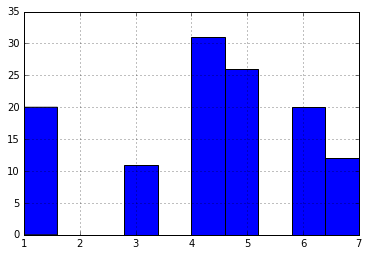

In [16]:
# plot rating per image distribution
image_count = classifications.subject_ids.value_counts()
image_count.hist()

In [17]:
#Merge Users rating
conctat_rating = [classifications[classifications.user_name == user][['ID','rating']].rename(columns={'rating': user})
                  for user in list_user]
# keep unique ID's
concats_unique = [conctat_rating[ii].ix[conctat_rating[ii].ix[:,0].drop_duplicates().index] 
                  for ii in range(len(conctat_rating))]
df_rating = reduce(lambda left,right: pd.merge(left,right,how='outer',on='ID'), concats_unique)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [18]:
df_rating

,ID,equidad1,Notkabene,rubyadeline,Neuromarq,Janet616,Twieden,Kay_scor4,not-logged-in-afcc4e345038a301bf87,Yassinebha
0,X4104523,OK,Maybe,Maybe,NaN,Fail,Fail,Fail,NaN,NaN
1,X0010031,OK,Maybe,Maybe,NaN,NaN,NaN,NaN,NaN,NaN
2,X3917422,OK,Maybe,OK,OK,Fail,NaN,OK,Maybe,NaN
3,X0010052,Maybe,OK,Fail,OK,NaN,NaN,NaN,NaN,NaN
4,X2232376,OK,Fail,OK,NaN,NaN,NaN,NaN,NaN,NaN
5,X0010029,OK,OK,Maybe,OK,OK,OK,NaN,NaN,NaN
6,X0026043,OK,Maybe,Fail,Maybe,Maybe,NaN,NaN,NaN,NaN
7,X0021018,OK,OK,Maybe,OK,NaN,NaN,OK,NaN,NaN
8,X4362730,Fail,Maybe,Maybe,OK,NaN,NaN,NaN,NaN,NaN
9,X0010009,Fail,Fail,Maybe,NaN,NaN,OK,Maybe,OK,NaN


In [19]:
df_rating.count()

ID                                    100
equidad1                              100
Notkabene                             100
rubyadeline                           100
Neuromarq                              48
Janet616                               35
Twieden                                35
Kay_scor4                              34
not-logged-in-afcc4e345038a301bf87     30
Yassinebha                             21
dtype: int64

In [20]:
# remove duplicates
#df_rating = df_rating[~df_rating.ID.duplicated()]

In [21]:
stuff = np.array([[row.ID,
                   np.sum(row[1:-1].values=='Fail'),
                   np.sum(row[1:-1].values=='Maybe'),
                   np.sum(row[1:-1].values=='OK')] for ind, row in df_rating.iterrows()])

In [22]:
df_score = pd.DataFrame(index=df_rating.index,data=stuff, columns=['ID','Fail', 'Maybe', 'OK'])

In [23]:
# Normalise table's row
df_score_tmp = df_score[['Fail','Maybe','OK']].astype('int')
nb_rating = df_score[['Fail','Maybe','OK']].astype('int').sum(axis="columns")
df_norm = pd.DataFrame( index=df_rating.index,columns=['ID','Fail', 'Maybe', 'OK'])
for status in ['Fail','Maybe','OK']:
    for image in df_score.index:
        df_norm[status][image] = np.int(df_score[status][image])/nb_rating[image]
        df_norm['ID'][image] = df_score['ID'][image]
# get max value
max_value = [row.iloc[1:].get_values().max() for ind,row in df_norm.iterrows()]
df_norm.loc[:,'max_value'] = max_value
# get concensus rating
max_rate = [row.iloc[1:].idxmax(axis=1) for ind,row in df_norm.iterrows()]
df_norm.loc[:,'concensus_rate'] = max_rate

In [24]:
df_score.head()

,ID,Fail,Maybe,OK
0,X4104523,3,2,1
1,X0010031,0,2,1
2,X3917422,1,2,4
3,X0010052,1,1,2
4,X2232376,1,0,2


In [25]:
df_norm.head()

,ID,Fail,Maybe,OK,max_value,concensus_rate
0,X4104523,0.5,0.333333,0.166667,0.500000,Fail
1,X0010031,0,0.666667,0.333333,0.666667,Maybe
2,X3917422,0.142857,0.285714,0.571429,0.571429,OK
3,X0010052,0.25,0.25,0.5,0.500000,OK
4,X2232376,0.333333,0,0.666667,0.666667,OK


## Histograms
Histograms of the frequency of the "OK", "Maybe" and "fail" rating across raters, for all images. If all raters agreed, we would only have 0% or 100% rating frequencies. 

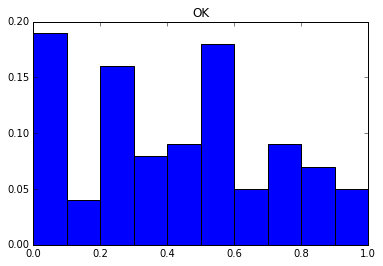

In [26]:
# Histogram of OK
hok , bins = np.histogram(df_norm.OK,bins=np.arange(0,1.1,0.1))
hok = hok.astype(np.float32) / hok.sum()
plt.bar(bins[:-1], hok , width=(bins[1]-bins[0]))
plt.title('OK')

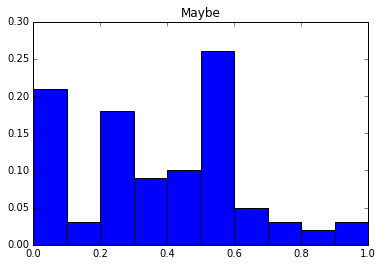

In [27]:
# Histogram of Maybe
hmaybe , bins = np.histogram(df_norm.Maybe,bins=np.arange(0,1.1,0.1))
hmaybe = hmaybe.astype(np.float32) / hmaybe.sum()
plt.bar(bins[:-1], hmaybe , width=(bins[1]-bins[0]))
plt.title('Maybe')

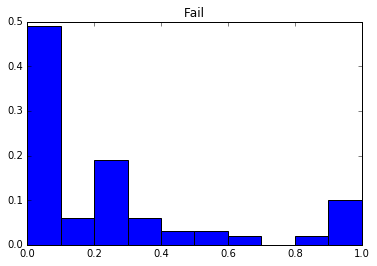

In [28]:
# Histogram of Fail
hfail , bins = np.histogram(df_norm.Fail,bins=np.arange(0,1.1,0.1))
hfail = hfail.astype(np.float32) / hfail.sum()
plt.bar(bins[:-1], hfail , width=(bins[1]-bins[0]))
plt.title('Fail')

## Kappa score

In [29]:
# filter user who completed rating for kappa
name_users_kappa = [ix for ix,x in user_count.iteritems() if x >= 70]
name_users_kappa

['equidad1', 'Notkabene', 'rubyadeline']

In [30]:
#select raters
df_kappa = df_rating[["ID"]+ name_users_kappa]
df_kappa.count()

ID             100
equidad1       100
Notkabene      100
rubyadeline    100
dtype: int64

In [31]:
# add matching column 
df_kappa.loc[:,"rating_match"] = df_kappa.iloc[:,1:].apply(lambda x: len(set(x)) == 1, axis=1)

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [32]:
df_kappa.to_csv(os.path.join(path_root,'full_lunch_anat_V01/non_expert-project-classifications_sub-select.csv'))
df_kappa.head()

,ID,equidad1,Notkabene,rubyadeline,rating_match
0,X4104523,OK,Maybe,Maybe,False
1,X0010031,OK,Maybe,Maybe,False
2,X3917422,OK,Maybe,OK,False
3,X0010052,Maybe,OK,Fail,False
4,X2232376,OK,Fail,OK,False


In [33]:
df_kappa.dropna(inplace=True)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
df_kappa.count()

ID              100
equidad1        100
Notkabene       100
rubyadeline     100
rating_match    100
dtype: int64

In [35]:
# Replace OK:1 , Maybe:2 and Fail:3
df_kappa.replace({'OK':1,'Maybe':2, 'Fail':3}, inplace=True)
df_kappa.head()

/usr/local/lib/python3.5/dist-packages/pandas/core/generic.py:3836: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  limit=limit, regex=regex)


,ID,equidad1,Notkabene,rubyadeline,rating_match
0,X4104523,1,2,2,False
1,X0010031,1,2,2,False
2,X3917422,1,2,1,False
3,X0010052,2,1,3,False
4,X2232376,1,3,1,False


In [36]:
# remove duplicates ID's
df_kappa = df_kappa[~df_kappa.ID.duplicated()]# remove duplicates ID's
df_kappa = df_kappa[~df_kappa.ID.duplicated()]
df_kappa.count()

ID              100
equidad1        100
Notkabene       100
rubyadeline     100
rating_match    100
dtype: int64

In [37]:
# calculate the percentage of agreement
agreem_num = (df_kappa.rating_match.sum()/df_kappa.ID.count())*100
"The percentage of agreement is: {:.2f}".format(agreem_num)

'The percentage of agreement is: 26.00'

In [38]:
# Generate Kappa matrix rater by rater
kappa_store = np.zeros((len(name_users_kappa), len(name_users_kappa)))
for net_id in range(len(name_users_kappa)):
    rater_1 = name_users_kappa[net_id]
    for s_id in range(len(name_users_kappa)):
        rater_2 = name_users_kappa[s_id]
        kappa = metrics.cohen_kappa_score(df_kappa[[rater_1]],df_kappa[[rater_2]])
        # Save the kappa
        kappa_store[net_id, s_id] = kappa

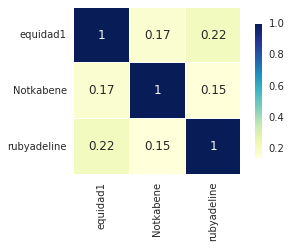

In [39]:
# Plot kappa matrix

kappa_out = pd.DataFrame(kappa_store, index=name_users_kappa, columns=name_users_kappa)
sns.set(style="white")
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 3))
# Draw the map
sns.heatmap(kappa_out,vmax=1,cmap="YlGnBu",
            square=True,annot=True,
            linewidths=.5, cbar_kws={"shrink": .8}, ax=ax)

In [40]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://i.stack.imgur.com/kYNd6.png" ,width=600, height=600)

## Plot tagging on images 

In [100]:
%matplotlib inline
import os
import matplotlib
import matplotlib.pyplot as plt

In [101]:
#base_path = '/home/yassinebha/Drive/QC_zooniverse_2/brainhack2017/rating_images'

In [102]:
# output markings from 50 classifications
#Basile
clist=[]
for index, c in classifications.iterrows():
    if c['n_tagging'] > 0:
        for q in c.annotations[0]['value']:
            clist.append({'ID':c.ID, 'workflow_name':c.workflow_name,'user_name':c.user_name, 'rating':c.rating,'imgnm':c.imgnm, 
                          'x':q['x'], 'y':np.round(q['y']).astype(int), 'r':'2','n_tagging':c.n_tagging ,'frame':q['frame']})
    else:
        clist.append({'ID':c.ID, 'workflow_name':c.workflow_name, 'user_name':c.user_name,'rating':c.rating,'imgnm':c.imgnm, 
                          'x':float('nan'), 'y':float('nan'), 'r':float('nan'),'n_tagging':c.n_tagging ,'frame':'1'})

col_order=['ID','workflow_name','user_name','rating','x','y','r','n_tagging','imgnm','frame']
out = pd.DataFrame(clist)[col_order]

In [103]:
out.head()

,ID,workflow_name,user_name,rating,x,y,r,n_tagging,imgnm,frame
0,X3169448,Start Project,Yassinebha,OK,NaN,NaN,NaN,0,X_3169448_anat.png,1
1,X0010125,Start Project,Yassinebha,OK,NaN,NaN,NaN,0,X_0010125_anat.png,1
2,X0026039,Start Project,Yassinebha,OK,NaN,NaN,NaN,0,X_0026039_anat.png,1
3,HC0040053,Start Project,Yassinebha,OK,NaN,NaN,NaN,0,HC0040053_anat.png,1
4,X2996531,Start Project,Yassinebha,OK,NaN,NaN,NaN,0,X_2996531_anat.png,1


In [104]:
# out only selected rater
out_kappa = out.loc[out['user_name'].isin(name_users_kappa)]
# out only kappa rated images
out_kappa = out_kappa.loc[out_kappa['ID'].isin(df_kappa.ID)]
out_kappa.head()

,ID,workflow_name,user_name,rating,x,y,r,n_tagging,imgnm,frame
366,X2920716,Start Project,Notkabene,Fail,NaN,NaN,NaN,0,X_2920716_anat.png,1
367,X0010125,Start Project,Notkabene,Maybe,31.0,391.0,2,2,X_0010125_anat.png,0
368,X0010125,Start Project,Notkabene,Maybe,524.0,205.0,2,2,X_0010125_anat.png,0
369,X2854839,Start Project,Notkabene,Fail,130.0,176.0,2,5,X_2854839_anat.png,0
370,X2854839,Start Project,Notkabene,Fail,166.0,165.0,2,5,X_2854839_anat.png,0


In [105]:
ids_imgnm = np.reshape([out.ID.unique(),out.imgnm.unique()],(2,np.shape(out.ID.unique())[0]))

In [106]:
from shutil import copyfile, copy2
#base_path_src = os.path.join(path_root,'zooqc_report_adhd_03-Jul-2017/registration')
base_path_src = os.path.join(path_root,'zooqc_report_cobre_03-Jul-2017/registration')
base_path_dest = os.path.join(path_root,'Beta2/rating_images')

In [107]:
# juste run once to collect images in specific folder
#from shutil import copyfile, copy2
#base_path_src = os.path.join(path_root,'zooqc_report_adhd_03-Jul-2017/registration')
#base_path_src = os.path.join(path_root,'zooqc_report_cobre_03-Jul-2017/registration')
#base_path_dest = os.path.join(path_root,'Beta2/rating_images')
#for ii in np.sort(ids_imgnm.T[:,1])[:15]:#[15:]
    #print(ii)
    #copy2(os.path.join(base_path_src,ii),base_path_dest)

In [108]:
df_ids_imgnm = pd.DataFrame(np.sort(ids_imgnm.T, axis=0),columns=['ID', 'imgnm'])

In [109]:
df_ids_imgnm.count()

ID       100
imgnm    100
dtype: int64

In [111]:
from matplotlib.colors import LinearSegmentedColormap
from PIL import Image
def _cmap_from_image_path(img_path):
        img = Image.open(img_path)
        img = img.resize((256, img.height))
        colours = (img.getpixel((x, 0)) for x in range(256))
        colours = [(r/255, g/255, b/255, a/255) for (r, g, b, a) in colours]
        return colours,LinearSegmentedColormap.from_list('from_image', colours)

In [112]:
coll,a=_cmap_from_image_path('/media/yassine/data_disk/Drive/QC_zooniverse_2/full_lunch_anat_V01/default.png')
#invert color map
coll_r = matplotlib.colors.ListedColormap(coll[::-1])

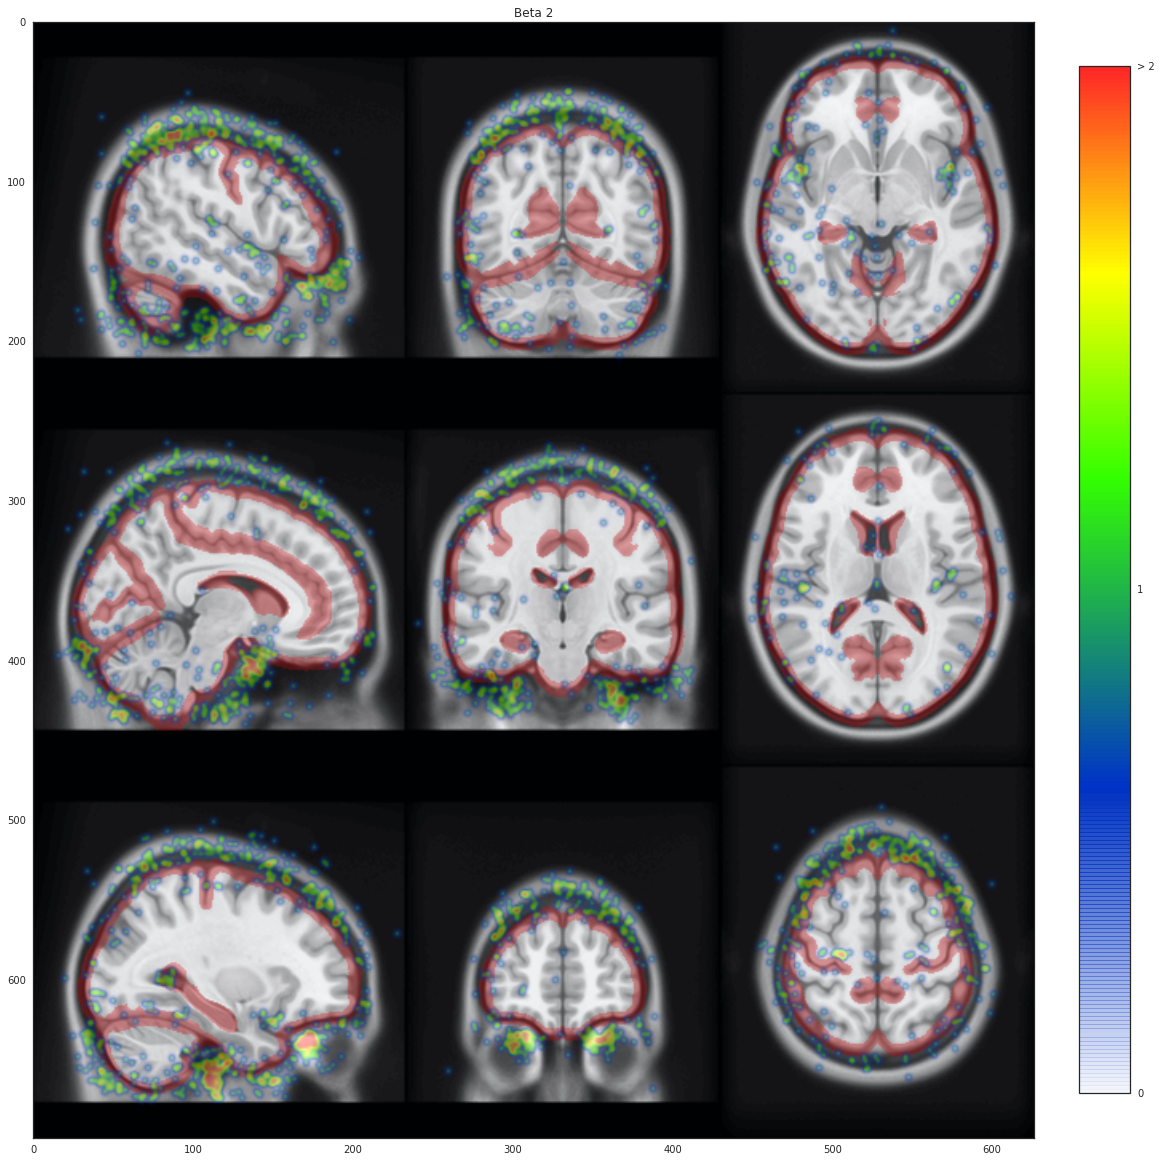

In [115]:
from heatmappy import Heatmapper
from PIL import Image
patches=list()
for ind, row in df_ids_imgnm.iterrows():
    out_tmp = out[out['ID'] == row.ID]
    patches.append([(row.x,row.y) for ind,row in out_tmp.iterrows()])
# plot heat map on the template
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
img = Image.open(os.path.join(path_root,'tutorial_v2/anat_fail/anat_template_stereotaxic.png'))
ax.set_title('Beta 2')
patches = [x for x in sum(patches,[]) if str(x[0]) != 'nan'] 
heatmapper = Heatmapper(opacity=0.4,
                        point_diameter=8,
                        point_strength = 0.5,
                        colours=a)
heatmap = heatmapper.heatmap_on_img(patches, img)
im = ax.imshow(heatmap,cmap=coll_r)
cbar = fig.colorbar(im, orientation='vertical', ticks=[0, 125, 255],fraction=0.046, pad=0.04)
cbar.ax.set_yticklabels(['0', '1', '> 2'])
img.close()
heatmap.close()

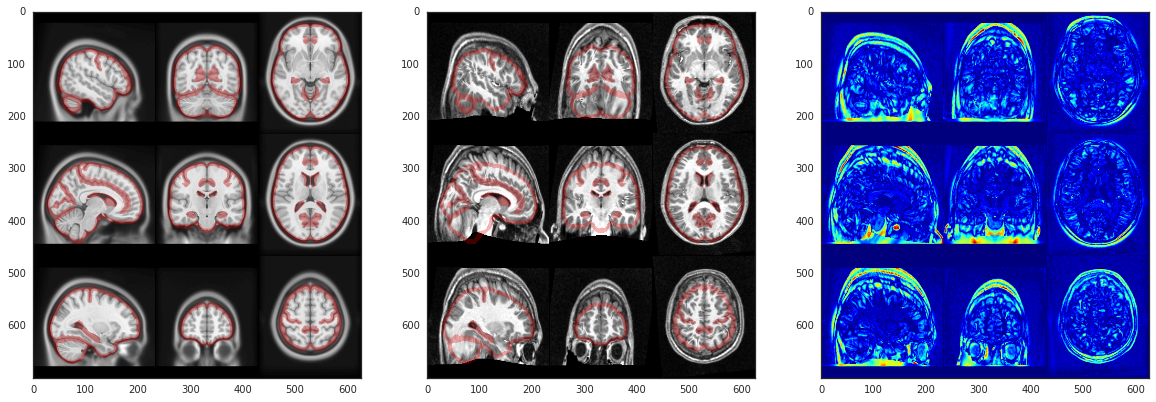

In [109]:
import pylab
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
img1 = mpimg.imread(os.path.join(path_root,'tutorial_v2/anat_fail/anat_template_stereotaxic.png'))
img2 = mpimg.imread(os.path.join(base_path_dest,'X_0021014_anat.png'))

# Calculate the absolute difference on each channel separately
error_r = np.fabs(np.subtract(img2[:,:,0], img1[:,:,0]))
error_g = np.fabs(np.subtract(img2[:,:,1], img1[:,:,1]))
error_b = np.fabs(np.subtract(img2[:,:,2], img1[:,:,2]))

# Calculate the maximum error for each pixel
lum_img = np.maximum(np.maximum(error_r, error_g), error_b)

# Uncomment the next line to turn the colors upside-down
#lum_img = np.negative(lum_img);

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(131)
ax1.imshow(img1)
ax2 = fig.add_subplot(132)
ax2.imshow(img2)
ax3 = fig.add_subplot(133)
ax3.imshow(lum_img,cmap='jet')
# Choose a color palette
#ax3.set_cmap('Spectral') 
